# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [10]:
# 1) Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Load cleaned Airbnb dataset (after uploading to Google Colab)
# Make sure you’ve uploaded "cleaned_airbnb_data.csv" in the left sidebar before running this
df = pd.read_csv("cleaned_airbnb_data.csv")

# 3) Preview dataset
df.head()

# 4) Check basic info
df.info()

# 5) Check for missing values
df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 85 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9691 non-null   int64  
 1   listing_url                                   9691 non-null   object 
 2   scrape_id                                     9691 non-null   int64  
 3   last_scraped                                  9691 non-null   object 
 4   source                                        9691 non-null   object 
 5   name                                          9691 non-null   object 
 6   description                                   9476 non-null   object 
 7   neighborhood_overview                         4953 non-null   object 
 8   picture_url                                   9691 non-null   object 
 9   host_id                                       9691 non-null   i

,0
host_neighbourhood,5550
neighborhood_overview,4738
neighbourhood,4738
host_response_rate,4651
beds,4212
estimated_revenue_l365d,4205
bathrooms,4197
host_acceptance_rate,3923
review_scores_location,1772
review_scores_value,1772


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



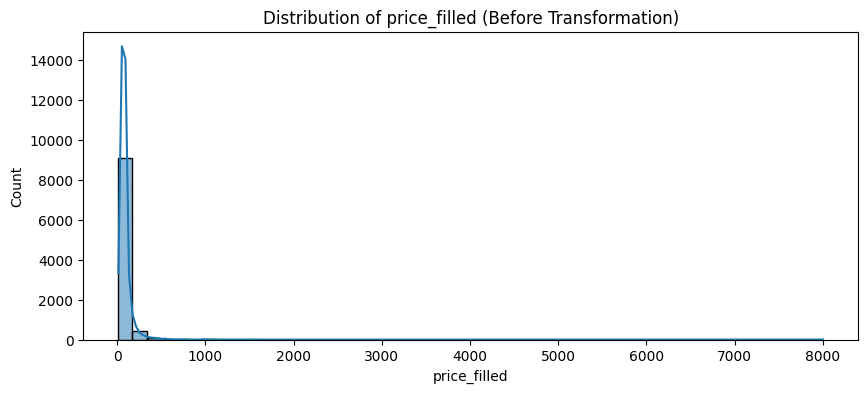

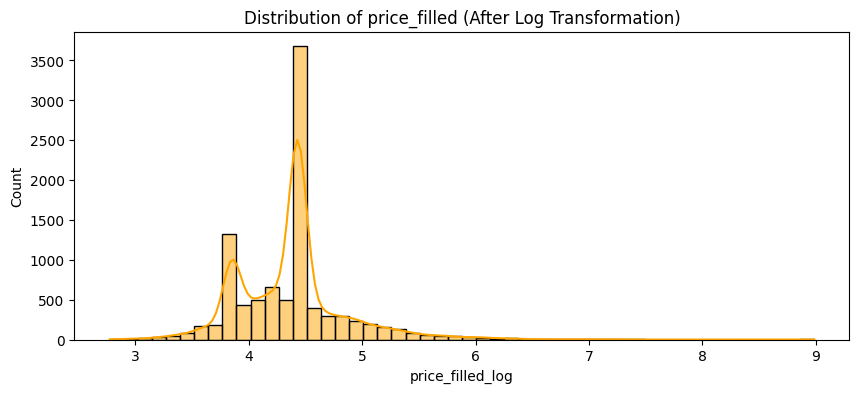

Skewness before: 39.58185470037969
Skewness after: 1.2364380901380336


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example: Check skew in the 'price_filled' column
col = "price_filled"

# 1) Plot histogram before transformation
plt.figure(figsize=(10,4))
sns.histplot(df[col], bins=50, kde=True)
plt.title(f"Distribution of {col} (Before Transformation)")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

# 2) Apply log transformation (add 1 to avoid log(0))
df[f"{col}_log"] = np.log1p(df[col])

# 3) Plot histogram after transformation
plt.figure(figsize=(10,4))
sns.histplot(df[f"{col}_log"], bins=50, kde=True, color="orange")
plt.title(f"Distribution of {col} (After Log Transformation)")
plt.xlabel(f"{col}_log")
plt.ylabel("Count")
plt.show()

# 4) Optional: print skewness before and after
print("Skewness before:", df[col].skew())
print("Skewness after:", df[f'{col}_log'].skew())

### ✍️ Your Response: 🔧
1. I examined the price_filled column, which shows each listings nightly price. It showed strong right skew due to the small numkber of very expensive listings.

2. I applied a log transformation to reduce skewness and compress large values. This method helped stabilize variance and makes the distribution more normal.

3. The transformed version produced a more balance distribution, allowing averages and trends to be looked into accurately. It also makes visualizations clearer and model traing much better.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Example: comparing 'price_filled' and 'minimum_nights'
# 1) Choose columns
cols_to_scale = ["price_filled", "minimum_nights"]

# 2) Initialize scalers
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# 3) Apply Min-Max scaling to price_filled
df["price_filled_scaled"] = minmax_scaler.fit_transform(df[["price_filled"]])

# 4) Apply Z-score normalization to minimum_nights
df["minimum_nights_zscore"] = zscore_scaler.fit_transform(df[["minimum_nights"]])

# 5) Preview new columns
df[["price_filled", "price_filled_scaled", "minimum_nights", "minimum_nights_zscore"]].head()


,price_filled,price_filled_scaled,minimum_nights,minimum_nights_zscore
0,121.0,0.013275,30,-0.303944
1,90.0,0.009393,2,-0.499635
2,83.0,0.008516,2,-0.499635
3,88.0,0.009142,365,2.037355
4,189.0,0.021791,2,-0.499635


### ✍️ Your Response: 🔧
1. I scaled price_filled using the min max scaling method and minimum_nights using zscore normalization. This made sure both columns were transformed to comparable ranges without distorting their relative differences.

2. Scaled values are more useful when building models or comparing variables measured on different scales. They help algorithms interpret each feature equally without one dominating due to larger numbers.

3. Data engineers/scientists and pricing analysts at ABnB would benefit because scaling enables fair comparisons across variables like price and stay duration. It helps them create more balanced models for pricing, forecasting, and behavior analysis.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [13]:
import pandas as pd

# Example: group listings by number_of_reviews
col = "number_of_reviews"

# 1) Create 3 bins labeled Low, Medium, High
df["review_volume_group"] = pd.cut(
    df[col],
    bins=3,
    labels=["Low", "Medium", "High"]
)

# 2) Preview the new column
df[[col, "review_volume_group"]].head()

# 3) Check how many listings fall into each category
df["review_volume_group"].value_counts()

,count
review_volume_group,
Low,9545
Medium,130
High,16


### ✍️ Your Response: 🔧
1. I gropued number_of_reviews column into three categories, low, med, and high. This creates a simple, categorical view of review activity across the many listings.

2. Grouped views make patterns easier to spot then interpret by summarizing lots of data into clear groups. They help identify which listining have very little, moderate, or high levels of engagement without being distracted by exact counts or numbers.

3. This would help the marketing team as they would be able to quickly find listings with their desired levels of review activity, then make decisions upon that. For example, they could create a marketing strategy to boost engagement with low/moderate review listings.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [14]:
# 1) Create a ratio variable: cost per night (price_filled / minimum_nights)
df["cost_per_night"] = df["price_filled"] / df["minimum_nights"]

# 2) Create a flag variable: long_stay_flag (1 if minimum_nights > 30, else 0)
df["long_stay_flag"] = (df["minimum_nights"] > 30).astype(int)

# 3) Preview new columns
df[["price_filled", "minimum_nights", "cost_per_night", "long_stay_flag"]].head()


,price_filled,minimum_nights,cost_per_night,long_stay_flag
0,121.0,30,4.033333,0
1,90.0,2,45.000000,0
2,83.0,2,41.500000,0
3,88.0,365,0.241096,1
4,189.0,2,94.500000,0


### ✍️ Your Response: 🔧 🔧
1. I created cost_per_night and long_stay_flag, one calculates the nightly rate and the other indentifies listings that require stays longer than 30 days. These variables can show affordability and long term rental suitability.

2. Both hosts and ABnB managers could use these columns. Owners could evaluate their pricing competitiveness, while managers can analyze with listing appeal to long term guests.

3. These variables help identify whether pricing aligns with market norms and traveler demand. They also guide marketing or pricing adjustments to attract specific customer segments, for example, long term renters.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [15]:
import pandas as pd

# 1) Choose a categorical column — here we'll use 'room_type'
col = "room_type"

# 2) Apply one-hot encoding since room_type is nominal (no inherent order)
df_encoded = pd.get_dummies(df, columns=[col], prefix="room")

# 3) Preview the new encoded columns
df_encoded.filter(like="room_").head()


,bathroom_shared,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


### ✍️ Your Response: 🔧
1. I encoded the room_type column because it is a categorical variable that shows different accomodations. Converting it into numeric form allows it to be used effectively in models.

2. I used dummy variables as it is what I am most familar with and believe works best for this scenario. This method is ideal because room types have no inherent order.

3. This transformation lets models caputure how each different room type impacts pricing and booking behavior. It also helps dashboards and reports highlight key differences in performance and pricing across listing categories.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The most interesting step in my opinion is dummy variables, ever since I learned about them I was facinated. I love how you are able to convert characteristics to a number that allows a model to understand and interpret its effect on what we are looking into.

2. The cost_per_night and review_volume_group variables would be especially valuable. Hosts and analysts can use them to adjust pricing and identify what types or characteristics in their listings attract the most guest activity.

3. I would create a pricing and occupancy dashboard that visualizes relationships between price, location, and review volume. This would help hosts in a multitude of ways and make looking at what the data is showing very easy.

4. This project directly supports my learning outcome of applying data preperation and transformation techniques to extract business insights. It demonstrates how structured analytics, like CRISP-DM, turn raw data into actionable understanding for business to make decisions.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [17]:
!jupyter nbconvert --to html "assignment_07_WoodMason.ipynb"

[NbConvertApp] Converting notebook assignment_07_WoodMason.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 424215 bytes to assignment_07_WoodMason.html
